# Logistic Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc

import time

In [2]:
def plot_roc(y_test, pred):
    fpr, tpr, threshold = roc_curve(y_test, pred)
    roc_auc = auc(fpr, tpr)
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

In [3]:
df = pd.read_csv("final_aggregated_dataset.csv")
X = df.drop(columns={"address", "class", "min_delay","mean_delay", "median_delay"})
y = df["class"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## Without SMOTE

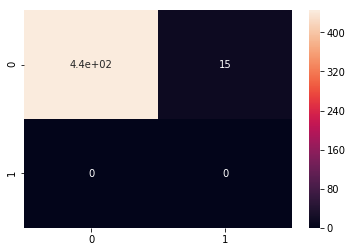

In [4]:
lr = LogisticRegression(penalty='l2')
lr.fit(X_train, y_train)
pred = lr.predict(X_test)
cm = confusion_matrix(pred, y_test)
sns.heatmap(cm, annot=True)

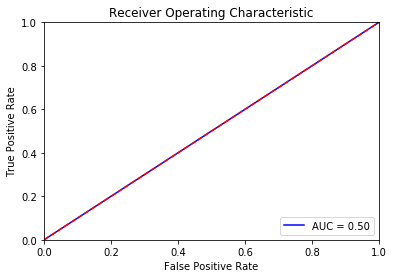

In [5]:
plot_roc(y_test, pred)

## With SMOTE

In [6]:
smt = SMOTE()
X_train, y_train = smt.fit_sample(X_train, y_train)
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [7]:
np.bincount(y_train)

array([1777, 1777], dtype=int64)

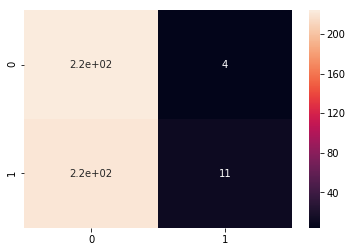

In [8]:
pred = lr.predict(X_test)
cm = confusion_matrix(pred, y_test)
sns.heatmap(cm, annot=True)

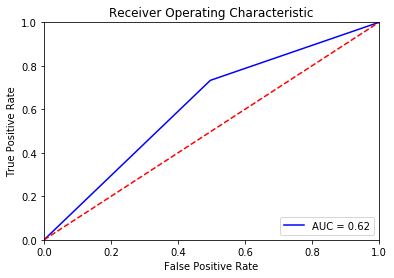

In [9]:
plot_roc(y_test, pred)

In [10]:
dual=[True,False]
max_iter=[100, 110, 120, 130, 140, 150]
param_grid = dict(dual=dual,max_iter=max_iter)

## Grid Search

In [11]:
lr = LogisticRegression(penalty='l2')
grid = GridSearchCV(estimator=lr, param_grid=param_grid, cv = 3, n_jobs=-1)
start_time = time.time()
grid_result = grid.fit(X_train, y_train)
print("Best:", grid_result.best_score_, " using ", grid_result.best_params_)
print("Execution time:", time.time() - start_time, " ms")

Best: 0.618458075407991  using  {'dual': False, 'max_iter': 100}
Execution time: 5.316569566726685  ms


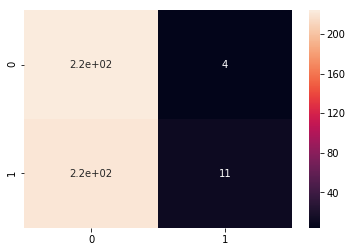

In [12]:
lr = LogisticRegression(penalty='l2', max_iter=100, dual=False)
lr.fit(X_train, y_train)
pred = lr.predict(X_test)
cm = confusion_matrix(pred, y_test)
sns.heatmap(cm, annot=True)

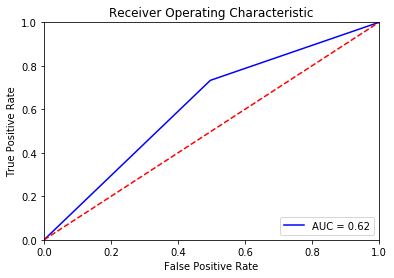

In [13]:
plot_roc(y_test, pred)